In [ ]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3218,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
3219,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
3220,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
3221,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [ ]:
df.shape

(3223, 7)

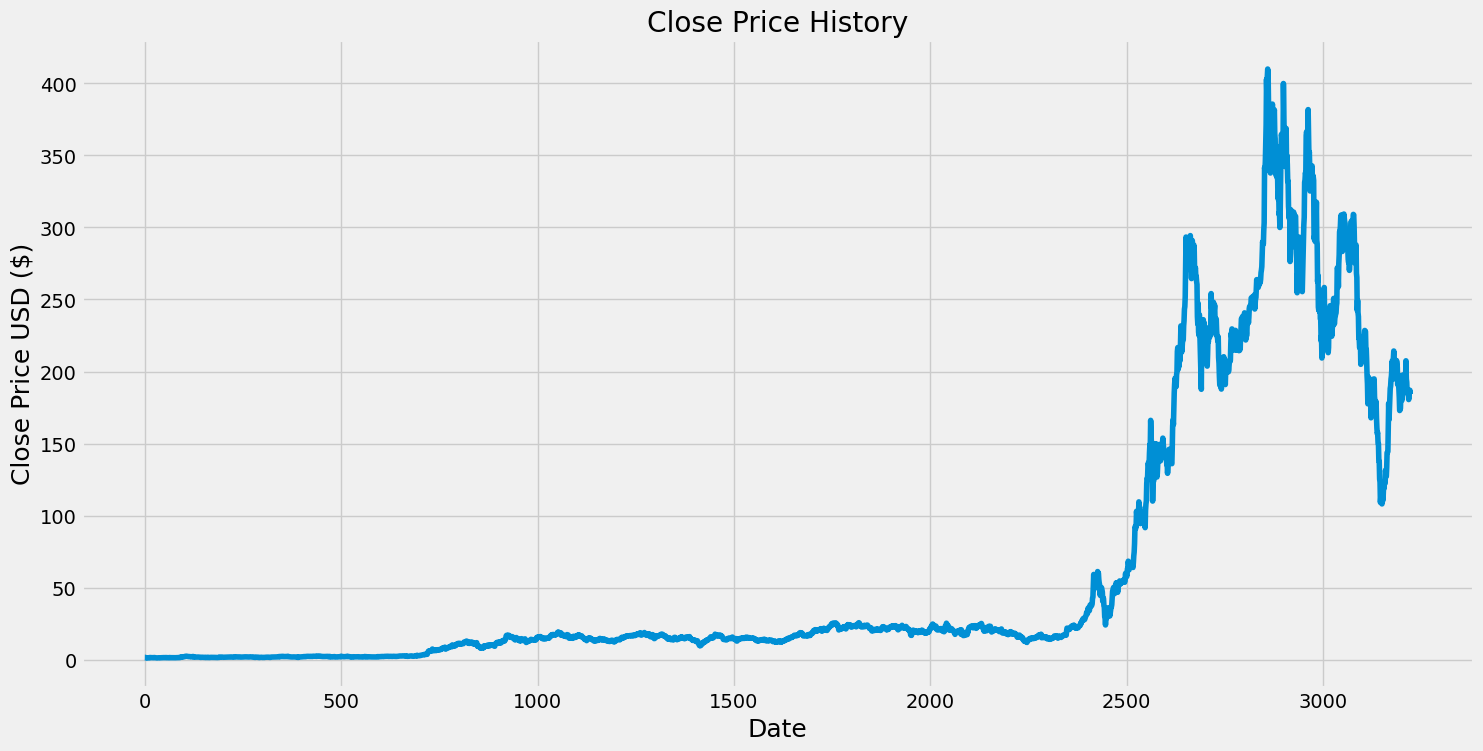

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
#get the number of rows to train the model on (80% of the data)
training_data_len = math.ceil(len(dataset) * .8 )

training_data_len

2579

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.449839  ],
       [0.45482778],
       [0.44815161]])

In [ ]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []
# time forcasting
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)

    print()

[array([1.31893376e-03, 1.30915182e-03, 1.00428041e-03, 5.54310983e-04,
       5.05408598e-05, 0.00000000e+00, 2.70634603e-04, 2.60852659e-04,
       2.03792133e-04, 3.81495821e-04, 6.58652535e-04, 6.66803340e-04,
       7.89077642e-04, 9.96129608e-04, 7.33645810e-04, 7.20604033e-04,
       8.47769306e-04, 8.95047888e-04, 8.39618501e-04, 7.74404725e-04,
       8.02119419e-04, 7.41799060e-04, 6.74954145e-04, 8.34727529e-04,
       1.00264927e-03, 8.90156916e-04, 7.58100670e-04, 6.17893619e-04,
       6.19524759e-04, 5.26596289e-04, 3.42368045e-04, 2.93458324e-04,
       4.10841653e-04, 4.85837374e-04, 5.46160178e-04, 4.84206234e-04,
       4.87468513e-04, 5.38006927e-04, 7.05931117e-04, 5.54310983e-04,
       6.68434479e-04, 6.43979619e-04, 6.35826368e-04, 6.63543507e-04,
       5.99960870e-04, 7.58100670e-04, 8.57551251e-04, 8.55920111e-04,
       7.72773586e-04, 8.31465251e-04, 8.00490725e-04, 7.12453228e-04,
       8.02119419e-04, 8.67333195e-04, 1.00754025e-03, 8.37987362e-04,
     

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(2519, 60, 1)

In [ ]:
#Build the LSTM model

model  = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = ( x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 1)

2519/2519 [==============================] - 83s 31ms/step - loss: 2.5027e-04


In [ ]:
#Create the testing data set
#Creat a new array containing scaled values from from index 1543 to 2003

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price value
predictions = model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 15ms/step


In [ ]:
#Get the root mean squared error
rmse = np.sqrt( np.mean( predictions - y_test )**2)

rmse

17.01660876788444

<ipython-input-29-8e62add0d9e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


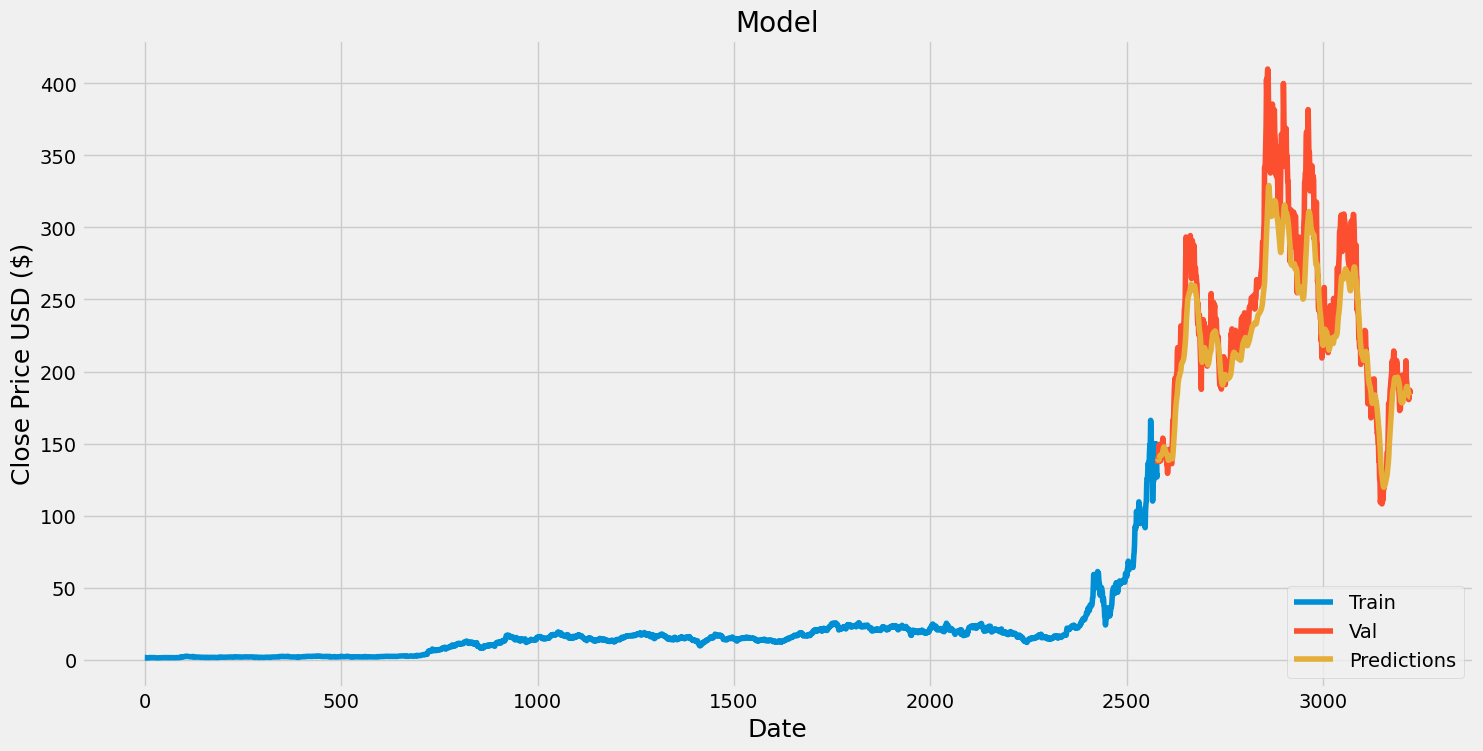

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices

valid

,Close,Predictions
2579,135.779999,139.688492
2580,140.399994,138.512939
2581,139.690002,138.441467
2582,143.003326,138.730804
2583,149.386673,139.534332
...,...,...
3218,180.539993,184.745102
3219,185.899994,183.385574
3220,185.000000,182.702728
3221,187.039993,182.258118


In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

6/6 [==============================] - 1s 35ms/step - loss: 62321.9922
test loss, test acc: 62321.9921875


In [ ]:
df2 = pd.read_csv("TSLA.csv")
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3218,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
3219,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
3220,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
3221,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [ ]:
#Create a new data frame
new_data = df2.filter(['Close'])

#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 27ms/step
[[181.99626]]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#linear Regression

df3 = pd.read_csv("TSLA.csv")
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3218,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
3219,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
3220,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
3221,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df.shape

(3223, 7)

In [ ]:
df3['Date'] = pd.to_datetime(df3.Date)

In [ ]:
df3.drop('Adj Close', axis = 1, inplace = True)
df3.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


In [ ]:
df3.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df3.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223 entries, 0 to 3222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3223 non-null   datetime64[ns]
 1   Open    3223 non-null   float64       
 2   High    3223 non-null   float64       
 3   Low     3223 non-null   float64       
 4   Close   3223 non-null   float64       
 5   Volume  3223 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 151.2 KB


In [ ]:
df3.describe()

,Open,High,Low,Close,Volume
count,3223.000000,3223.000000,3223.000000,3223.000000,3.223000e+03
mean,61.503223,62.892679,59.980186,61.467981,9.526609e+07
std,96.253462,98.473335,93.760425,96.142345,8.172672e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,9.450333,9.661000,9.219333,9.453333,4.340100e+07
50%,16.475332,16.682667,16.242001,16.473333,7.724790e+07
75%,34.048668,35.454666,33.332000,34.750000,1.208360e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


<Axes: >

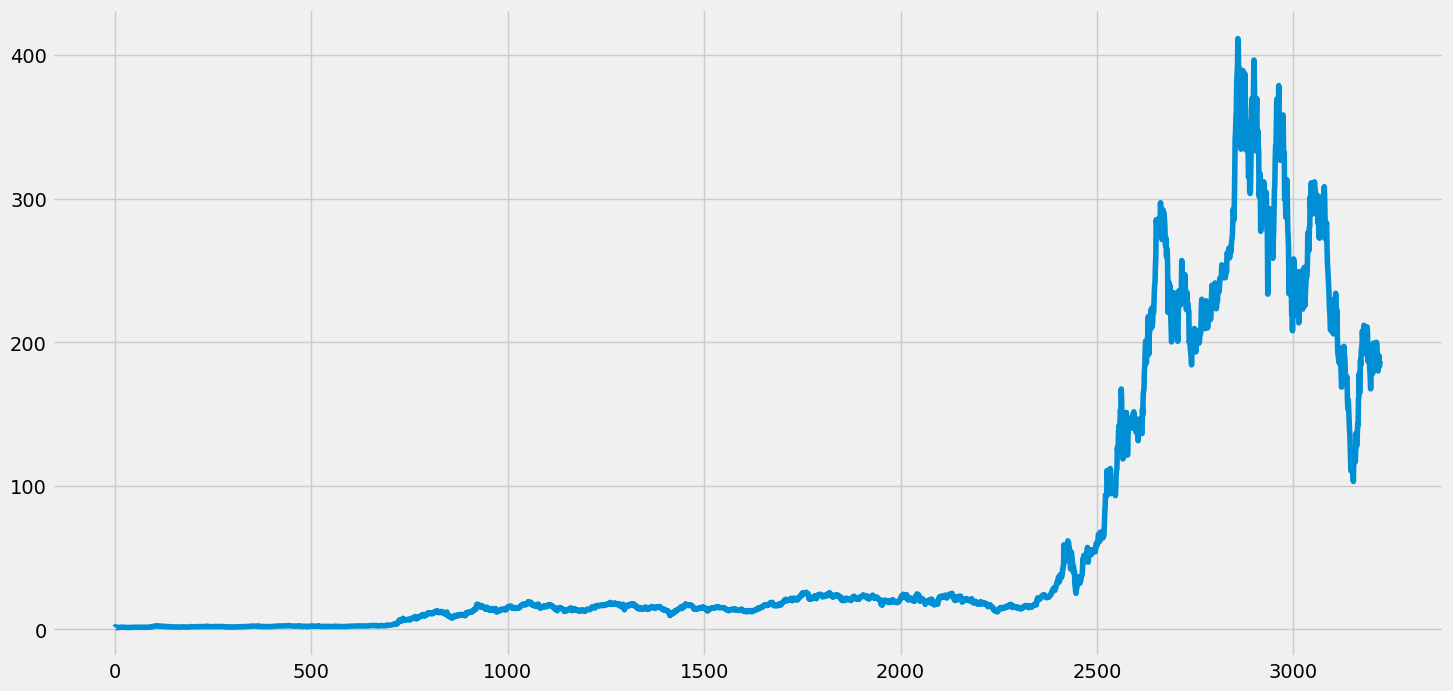

In [ ]:
df3['Open'].plot(figsize= (16,8))

In [ ]:
x = df3[['Open', 'High', 'Low','Volume']]
y = df3['Close']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [ ]:
x_train.shape


(2417, 4)

In [ ]:
x_test.shape

(806, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regression.coef_)

[-6.90129932e-01  8.71997298e-01  8.17218763e-01  3.69901110e-10]


In [ ]:
print(regression.intercept_)

-0.007448034220061572


In [ ]:
predicted = regression.predict(x_test)

In [ ]:
print(x_test)

            Open        High         Low     Volume
1764   24.247334   24.451332   23.974667   87727500
634     2.320000    2.320000    2.261333   10110000
3176  207.779999  214.000000  204.770004  215431400
1726   20.726667   20.919333   20.388000  105097500
1665   17.156668   17.557333   17.080000   58995000
...          ...         ...         ...        ...
879    10.000000   10.331333    9.988000  149122500
109     2.267333    2.286667    2.080000   30105000
2678  260.299988  264.896667  258.756653   53871300
927    16.942667   17.166668   16.629999  110416500
1106   17.057333   17.332666   17.034000   67095000

[806 rows x 4 columns]


In [ ]:
predicted.shape

(806,)

In [ ]:
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual Price': y_test,'Predicted Price':predicted})
print(dfr)

      Actual Price  Predicted Price
1764     24.107332        24.205235
634       2.293333         2.266228
3176    207.320007       210.626355
1726     20.479334        20.630392
1665     17.472000        17.442088
...            ...              ...
879      10.094000        10.317689
109       2.156667         2.132716
2678    262.459991       262.821636
927      16.862667        16.900389
1106     17.180000        17.280137

[806 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual Price,Predicted Price
1764,24.107332,24.205235
634,2.293333,2.266228
3176,207.320007,210.626355
1726,20.479334,20.630392
1665,17.472000,17.442088
961,13.857333,13.765282
661,2.563333,2.575990
1696,17.544001,17.493494
2433,44.532665,44.613781
562,2.070000,2.102897


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import math

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.654687215586172


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 2.6381924225877578


In [ ]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.6242513421843794


In [ ]:
regression.score(x_test, y_test)

0.9997305794039366

<Axes: >

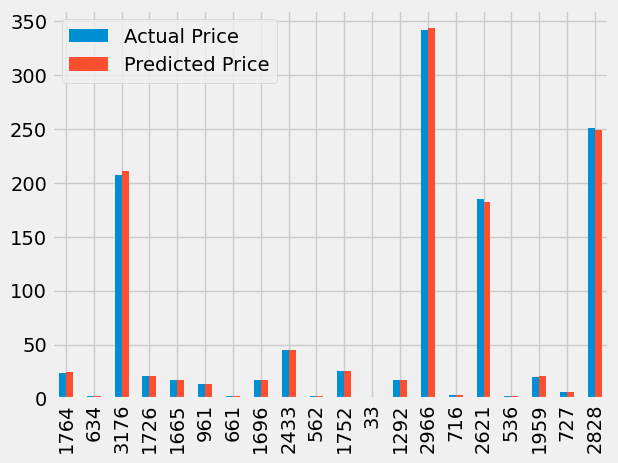

In [ ]:
graph = dfr.head(20)
graph.plot(kind='bar')

In [ ]:
#support vector machine

import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3218,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
3219,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
3220,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
3221,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [ ]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2010-06-29,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
2023-04-12,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
2023-04-13,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
2023-04-14,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
2023-04-17,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [ ]:
future_days = 5

In [ ]:
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)


In [ ]:
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2010-06-29,1.592667,1.053333
2010-06-30,1.588667,1.164000
2010-07-01,1.464000,1.160000
2010-07-02,1.280000,1.136667
2010-07-06,1.074000,1.209333
...,...,...
2023-04-12,180.539993,NaN
2023-04-13,185.899994,NaN
2023-04-14,185.000000,NaN
2023-04-17,187.039993,NaN


In [ ]:
X = np.array(df[['Close']])
X = X[:df.shape[0]- future_days]
print(X)

[[  1.592667]
 [  1.588667]
 [  1.464   ]
 ...
 [185.059998]
 [184.509995]
 [186.789993]]


In [ ]:
y = np.array(df[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[  1.053333   1.164      1.16     ... 185.       187.039993 184.309998]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train , y_train)

SVR(C=1000.0, gamma=1e-05)

In [ ]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:' , svr_rbf_confidence)

svr_rbf accuracy: 0.9891946704720314


In [ ]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 13.53329518  21.62356897 253.70602517  21.31307593  28.28671708
 301.97131982  55.12839831  54.9305188    2.42770907 145.95110067
   1.696993     2.13038738  21.3582054  238.42787323   2.12972804
 247.20454966 243.54863019  15.18391333 258.49683653  16.52966944
  16.29419657   1.84184516 182.99736005 227.17058566  27.40827102
 198.12332962   2.53851844  13.35034398 197.85383404  39.56988934
  12.25526926  14.96860838  17.28828479 204.85511714  15.46975569
  16.16530196  17.30391487  19.61671709  20.3380399    6.71226755
   6.47454054   1.38179288   2.33604992   1.63709299  21.71524066
   2.10205071   1.80035951 210.36634667  13.00216154 234.85961726
   2.09084885  15.27127687  17.11433679  24.52564863  46.95514804
  13.65282049  12.73914817  24.23932879 205.20359361  14.77300765
  17.2298424  281.91139625   1.38902817   1.82143072  15.37626561
  12.25594321 229.8693287    9.668955    23.13693672  57.35118313
  23.15750276   1.402842    16.9642119  223.01665101 199.97990967
   2.37165

In [ ]:
print(y_test)

[ 12.719333  20.787333 238.279999  20.346666  32.809334 310.416656
  55.173332  52.172001   2.526    139.690002   1.575333   2.071333
  23.006001 235.940002   2.397333 239.896667 222.960007  15.306
 239.706665  17.014     16.302      1.883333 150.229996 215.309998
  27.646667 173.440002   2.598667  13.973333 169.910004  48.98
  12.726667  15.551333  18.706667 199.593338  15.259333  16.058001
  16.712     18.966     20.096001   7.283333   6.172667   1.324667
   2.304667   1.564     19.828667   2.194667   1.705333 184.509995
  13.693333 217.720001   1.899333  15.622667  15.794     25.666668
  51.274666  13.304     13.55      21.927999 190.899994  16.473333
  16.504667 302.609985   1.336667   1.864667  15.937333  11.310667
 246.28334   10.948     21.68      59.043999  20.694668   1.380667
  16.844    211.873337 187.820007   2.322     16.862667 100.042664
   1.942667   2.2       21.148001 228.813339 189.190002   1.369333
  66.726669   1.37      12.094    219.350006  11.096667  17.471333
  

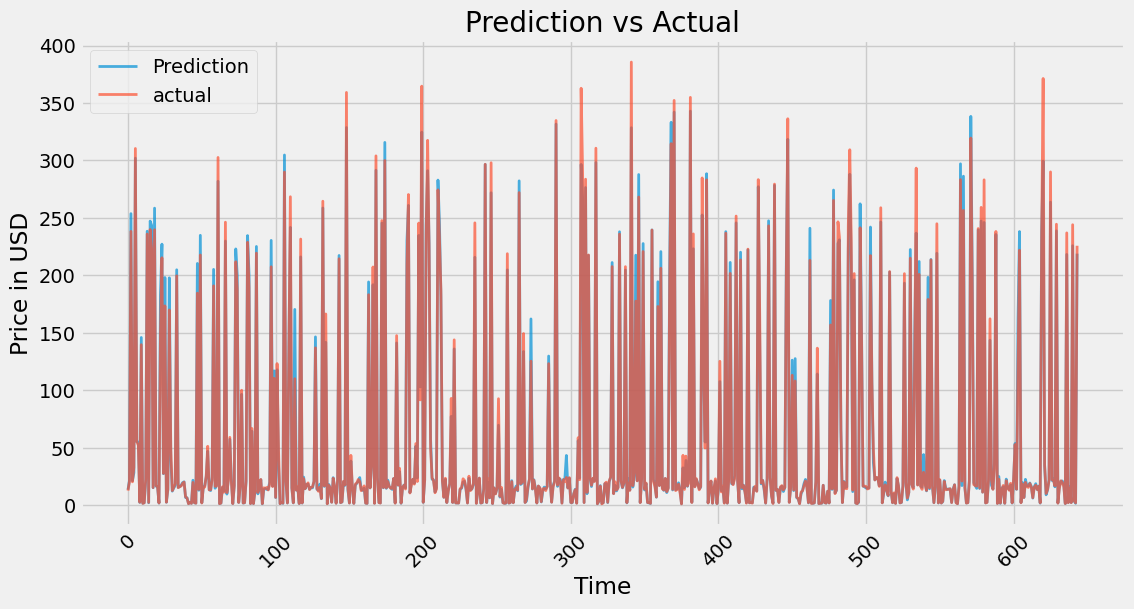

In [ ]:
 plt.figure(figsize= (12,6))
plt.plot(svm_prediction, label = 'Prediction', lw = 2, alpha= .7)
plt.plot(y_test, label = 'actual', lw = 2 , alpha = .7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation = 45)
plt.show()